In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

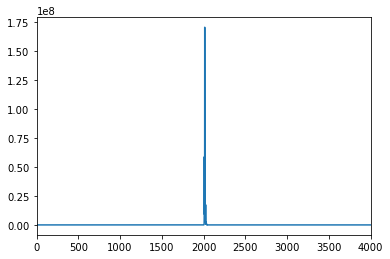

In [6]:
def e_detector_sr(data, lmbda, alt, w):
    N = len(data)
    E = np.zeros(N)
    M = np.zeros(len(alt))
    L = np.zeros(len(alt))
    for i in range(N):
        L = np.exp(lmbda-alt) * (alt/lmbda)**data[i]
        M = L*(M+1)
        E[i] = np.average(M, weights = w)
    return(E)

data = np.concatenate((np.random.poisson(100, 2000),np.random.poisson(120, 10),np.random.poisson(100, 2000)))
#data = np.random.poisson(100, 20000)
v=np.array([0,1,2,3,4,5,6,7,8,9])
s=np.array([1,2,3,4,5,6,7,8,9,np.inf])
wt = np.exp(-v)-np.exp(-s)
plt.plot(e_detector_sr(data, 100, np.array([110,120,130,140,150,160,170,180,190,200]), wt))
plt.xlim((0,len(data)))
plt.show()

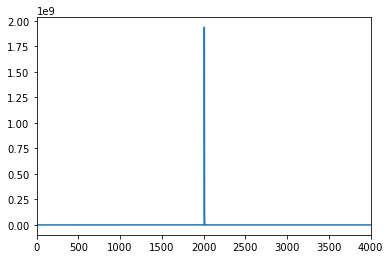

In [7]:
def e_detector_cusum(data, lmbda, alt, w):
    N = len(data)
    E = np.zeros(N)
    M = np.zeros(len(alt))
    L = np.zeros(len(alt))
    for i in range(N):
        L = np.exp(lmbda-alt) * (alt/lmbda)**data[i]
        M = L*np.maximum(M,1)
        E[i] = np.average(M, weights = w)
    return(E)

data = np.concatenate((np.random.poisson(100, 2000),np.random.poisson(120, 10),np.random.poisson(100, 2000)))
#data = np.random.poisson(100, 200000)
v=np.array([0,1,2,3,4,5,6,7,8,9])
s=np.array([1,2,3,4,5,6,7,8,9,np.inf])
wt = np.exp(-v)-np.exp(-s)
plt.plot(e_detector_cusum(data, 100, np.array([110,120,130,140,150,160,170,180,190,200]),wt))
plt.xlim((0,len(data)))
plt.show()

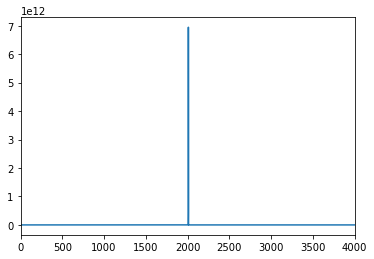

In [16]:
#wt = np.array([1/10]*10)
plt.plot(e_detector_sr(data, 100, np.array([110,120,130,140,150,160,170,180,190,200]), wt))
plt.xlim((0,len(data)))
plt.show()

In [17]:
model_ids = ['180703949','170803729','140624423']
#parameters
num = 0
model_id = model_ids[num]
fluences=np.arange(start=0, stop=351, step=10)
hmax=256
bin_width=0.05
fluence=300
data = pd.read_csv("simulations.csv", index_col="time") #contains simulations of each burst containing 10000 photons


Text(0.5, 1.0, 'Simulation of GRB 180703949 with photon count 300')

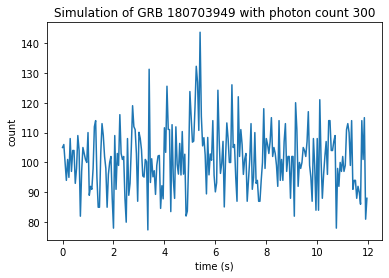

In [18]:
background = data['background']
burst_shape = data[model_id]
grb = background + fluence/100000 * burst_shape #rescaled model of burst with background
grb.plot()
plt.xlabel('time (s)')
plt.ylabel('count')
plt.title(f'Simulation of GRB {model_id} with photon count {fluence}')

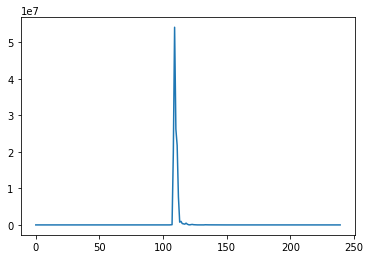

In [19]:
plt.plot(e_detector_sr(np.array(grb), 100,np.array([110,120,130,140,150,160,170,180,190,200]),wt))

In [23]:
alpha_levels = np.array([95000,100000,150000,200000])
λ = 36
alt = np.array([45,55,65,75,85,95,105,115,125,135])
runs = range(50)
size=2000000



data_esr1=pd.DataFrame(index=alpha_levels, columns=runs)
for run in runs:
    print(run)
    np.random.seed(run)
    signal = np.random.poisson(λ, size)
    significance = e_detector_sr(signal, λ, alt, wt)
    for alpha_level in alpha_levels:
        run_length = np.argmax(significance>alpha_level)
        if run_length == 0:
            run_length = size
        data_esr1.loc[alpha_level, run] = run_length

data_esr1["average"] = data_esr1.mean(axis="columns")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


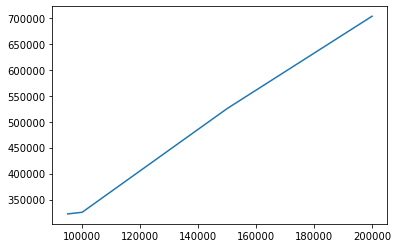

In [25]:
plt.plot(alpha_levels,data_esr1["average"])
plt.show()

In [26]:
print(data_esr1["average"])

95000     322431.52
100000    325594.58
150000    525181.62
200000    702995.96
Name: average, dtype: float64


In [34]:
print(100000+(481039.72-325594.58)/4)

138861.28499999997


In [8]:
alpha_levels = np.linspace(10**4,10**5, 20)
λ = 36
alt = np.array([45,55,65,75,85,95,105,115,125,135])
runs = range(50)
size=2000000


data_ecs=pd.DataFrame(index=alpha_levels, columns=runs)
for run in runs:
    np.random.seed(run)
    signal = np.random.poisson(λ, size)
    significance = e_detector_cusum(signal, λ, alt, wt)
    for alpha_level in alpha_levels:
        run_length = np.argmax(significance>alpha_level)
        if run_length == 0:
            run_length = size
        data_ecs.loc[alpha_level, run] = run_length

data_ecs["average"] = data_ecs.mean(axis="columns")

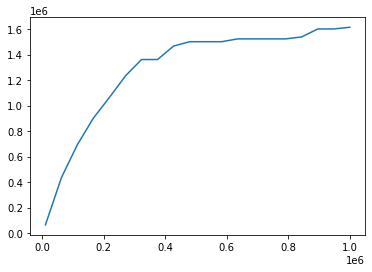

In [9]:
plt.plot(alpha_levels,data_ecs["average"])
plt.show()

In [36]:
print(data_ecs["average"])

10000.000000        63348.76
62105.263158       434783.88
114210.526316      694252.32
166315.789474      902650.04
218421.052632     1064975.50
270526.315789     1233572.22
322631.578947     1361613.32
374736.842105     1361613.34
426842.105263     1467077.18
478947.368421     1501469.02
531052.631579     1501469.12
583157.894737     1501469.14
635263.157895     1523531.14
687368.421053     1523531.14
739473.684211     1523531.14
791578.947368     1523531.16
843684.210526     1539088.30
895789.473684     1601423.68
947894.736842     1601515.84
1000000.000000    1614986.44
Name: average, dtype: float64


In [38]:
print(62105.263158+(481039.72-434783.88)*(114210.526316-62105.263158)/(694252.32-434783.88))

71394.14898856322
